# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
# Code Here
from palmerpenguins import load_penguins
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [2]:
penguins = load_penguins()
penguins = penguins.dropna()

In [3]:
dummylist = ["species", "island", "sex", "year"]
pd.get_dummies(penguins, columns = dummylist, prefix = dummylist)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,year_2007,year_2008,year_2009
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0,1,0,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0,1,0,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0,1,0,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,1,0,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,0,1,0,0,1,0,1,0,0,0,1
341,49.6,18.2,193.0,3775.0,0,1,0,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,0,1,0,0,1,0,0,1,0,0,1


You would need to dummify species, island, sex, and year.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [18]:
# Code Here

X = penguins["bill_length_mm"].values.reshape(-1,1)
y = penguins["bill_depth_mm"].values

penguins["bill_length_squared"] = penguins['bill_length_mm']**2

penguins["bill_length_cubed"] = penguins['bill_length_mm']**3

penguins["bill_length_tenth"] = penguins['bill_length_mm']**10



penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_square,bill_length_cubed,bill_length_tenth,simple_linear_reg,quadratic_reg,cubic_reg,degree_ten_reg,bill_length_squared
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,8.351559e+15,17.567673,17.542639,17.509238,17.229772,1528.81
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,9.246363e+15,17.534742,17.515421,17.487461,17.228358,1560.25
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827,1.129927e+16,17.468881,17.460154,17.442564,17.225114,1624.09
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863,4.432621e+15,17.765257,17.700131,17.630800,17.235965,1346.89
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49,60698.457,8.788717e+15,17.551207,17.529065,17.498405,17.229081,1544.49


In [21]:
#SLR
lr = LinearRegression()

lr_fit = lr.fit(X, y)

y_pred_lr = lr_fit.predict(X)

penguinplot = pd.DataFrame()
penguinplot["simple_linear_reg"] = y_pred_lr

In [23]:
#Quad Model
X = penguins["bill_length_squared"].values.reshape(-1,1)

qr_fit = lr.fit(X, y)

y_pred_qr = qr_fit.predict(X)

penguins["quadratic_reg"] = y_pred_qr

In [24]:
#Cubic Model
X = penguins["bill_length_cubed"].values.reshape(-1,1)

cm_fit = lr.fit(X, y)

y_pred_cm = cm_fit.predict(X)


penguins["cubic_reg"] = y_pred_cm

In [25]:
#Degree 10 model
X = penguins["bill_length_tenth"].values.reshape(-1,1)

ten_fit = lr.fit(X, y)

#prediction
y_pred_ten = ten_fit.predict(X)

#Add prediction to original dataframe to be plotted
penguins["degree_ten_reg"] = y_pred_ten

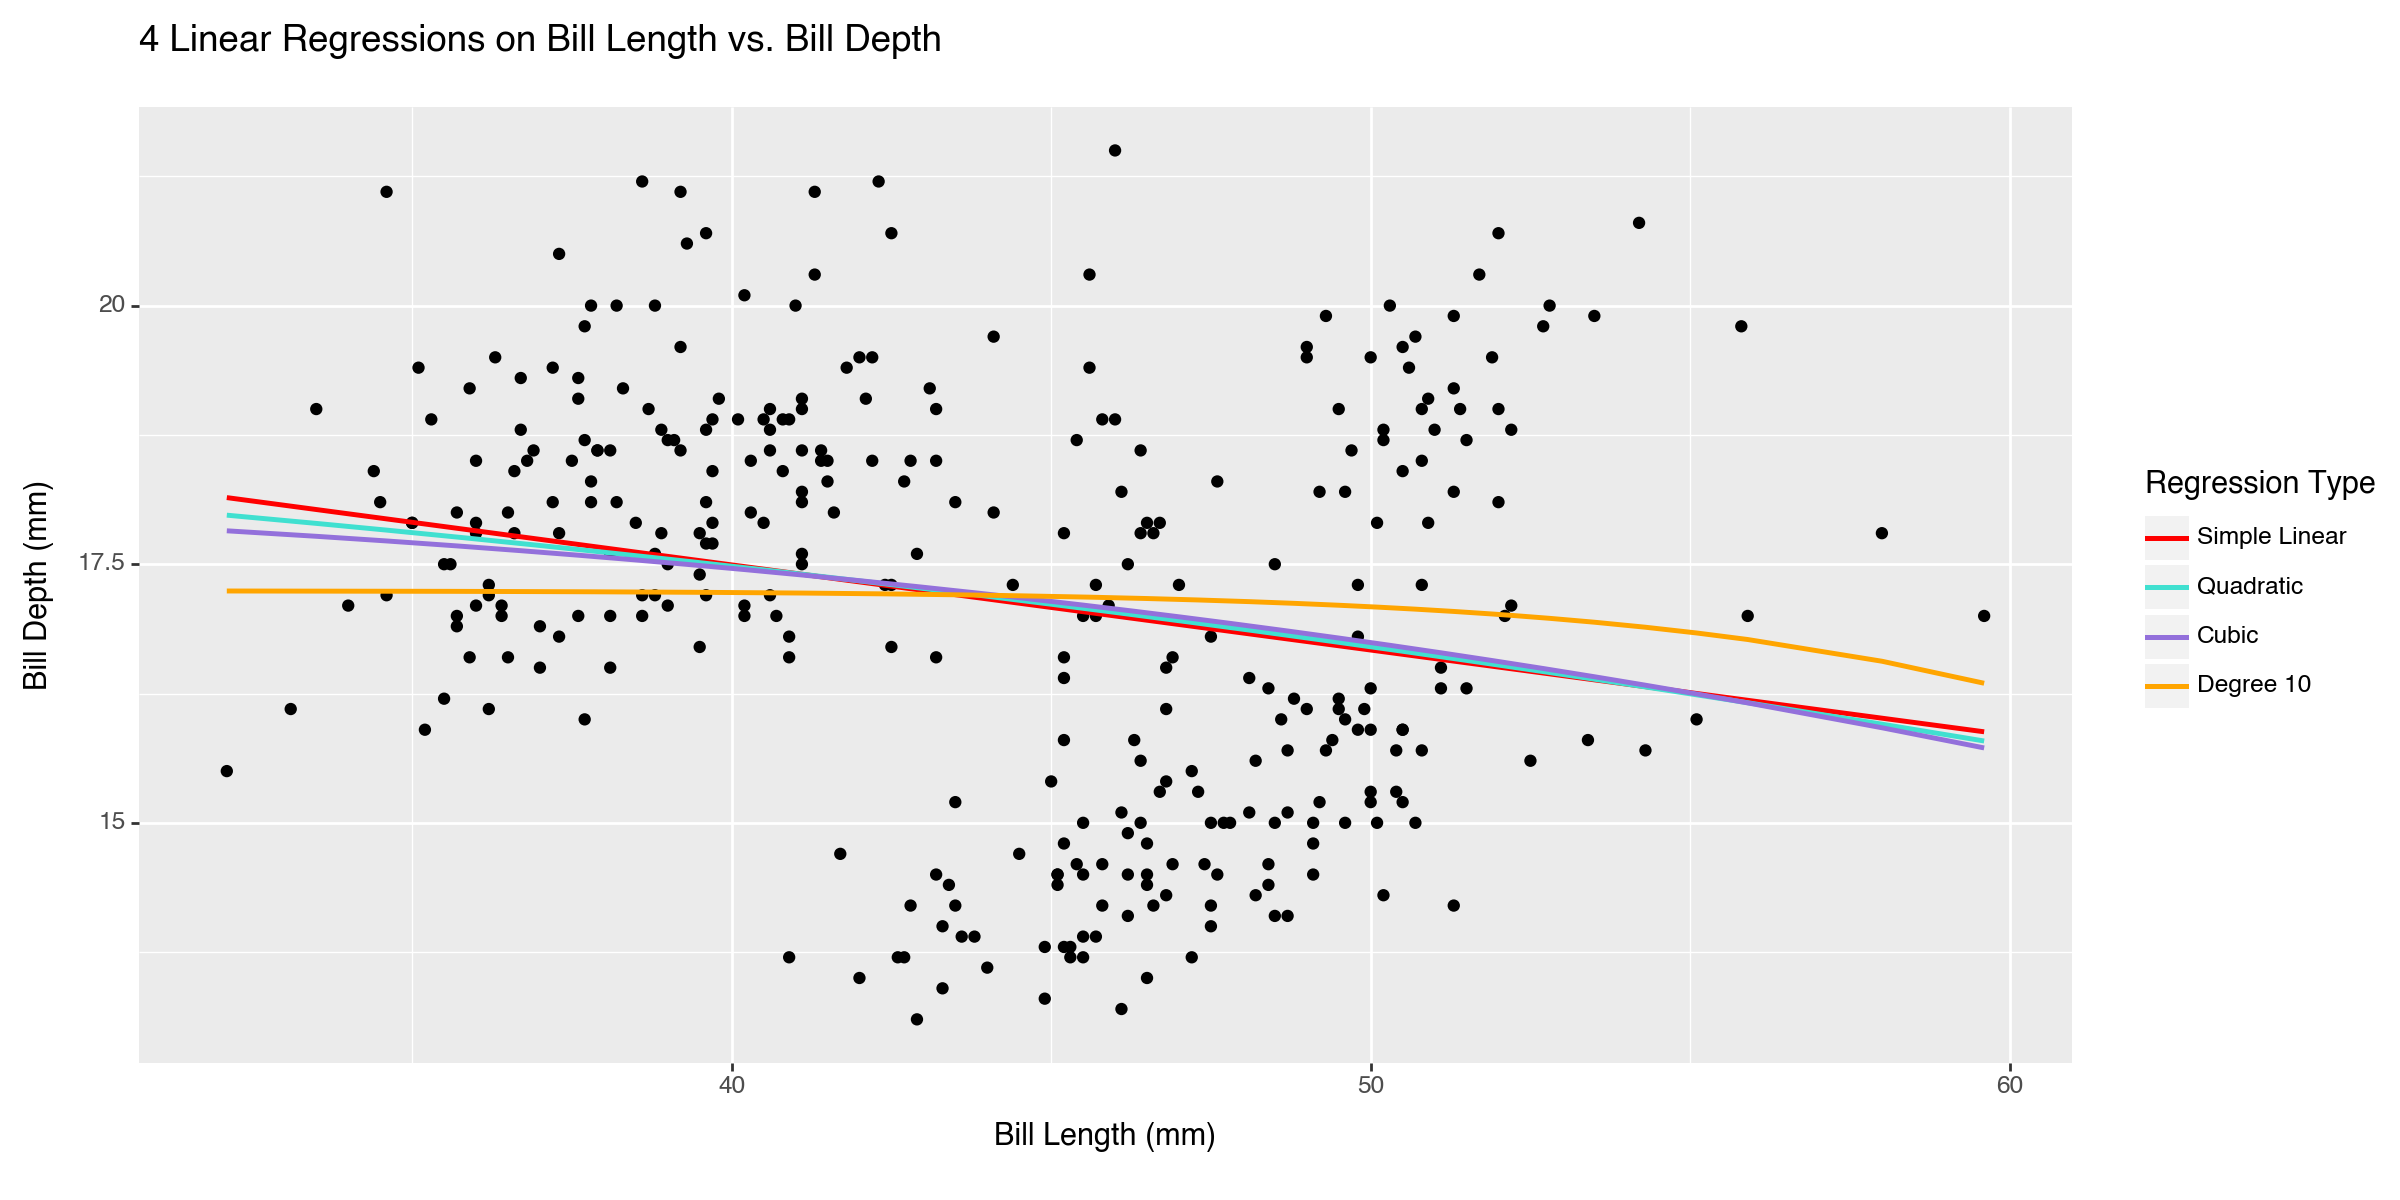

<Figure Size: (1200 x 600)>

In [26]:
# Code Here
from plotnine import *
(
    ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm'))
    + geom_point()
    + geom_line(aes(y='simple_linear_reg', color='"Simple Linear"'), size=1)
    + geom_line(aes(y='quadratic_reg', color='"Quadratic"'), size=1)
    + geom_line(aes(y='cubic_reg', color='"Cubic"'), size=1)
    + geom_line(aes(y='degree_ten_reg', color='"Degree 10"'), size=1)
    + scale_color_manual(values={
        'Simple Linear': 'red',
        'Quadratic': 'turquoise',
        'Cubic': 'mediumpurple',
        'Degree 10': 'orange'})
    + labs(title='4 Linear Regressions on Bill Length vs. Bill Depth',
         x='Bill Length (mm)', y='Bill Depth (mm)', color='Regression Type')
    + theme(legend_position='right', figure_size=(12, 6))
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Linear is underfitting, not capturing values well. Cubic and 10 Degree are overfitting